## Assignment 2: Data Analysis and Interpretation


## Contents
### 1. Data Description 
### 2. Variables Description 
### 3. Source

### Results data description
### Variables Description 
- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- home_score - full-time home team score including extra time, not including penalty-shootouts
- away_score - full-time away team score including extra time, not including penalty-shootouts
- tournament - the name of the tournament
- city - the name of the city/town/administrative unit where the match was played
- country - the name of the country where the match was played
- neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

In [6]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats 
from scipy.stats import norm,t
import statsmodels.api as sm 
from statsmodels.stats.proportion import proportion_confint 
import matplotlib.pyplot as plt 
from pandas.api.types import CategoricalDtype

In [7]:
df=pd.read_csv("results.csv")
df


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/22,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/22,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/22,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/22,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43188 entries, 0 to 43187
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43188 non-null  object
 1   home_team   43188 non-null  object
 2   away_team   43188 non-null  object
 3   home_score  43188 non-null  int64 
 4   away_score  43188 non-null  int64 
 5   tournament  43188 non-null  object
 6   city        43188 non-null  object
 7   country     43188 non-null  object
 8   neutral     43188 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [10]:
df.describe()

,home_score,away_score
count,43188.000000,43188.000000
mean,1.742544,1.182666
std,1.753055,1.399664
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [11]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [12]:
values= ['win','lose','draw']

In [13]:
df['result'] = np.select(conditions, values)

In [14]:
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,lose


In [15]:
df['result'].value_counts()

lose    21009
win     12224
draw     9955
Name: result, dtype: int64

In [16]:
df['result'].value_counts(normalize=True)

lose    0.486455
win     0.283042
draw    0.230504
Name: result, dtype: float64

In [17]:
x=df['result'].value_counts()
x=np.array(x)
x

array([21009, 12224,  9955])

In [18]:
N=x.sum()
N

43188

In [19]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))

In [20]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [21]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))

In [22]:
CI_lose

(0.481740705905987, 0.49116843552218753)

In [23]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))

In [24]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

In [25]:
df['country'].unique()

array(['Scotland', 'England', 'Wales', 'Ireland', 'United States',
       'Uruguay', 'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Bohemia', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Spain', 'Japan', 'Brazil', 'Paraguay', 'China PR',
       'Canada', 'Estonia', 'Guatemala', 'Czechoslovakia', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'Northern Ireland', 'Australia', 'Lithuania', 'Turkey', 'Mexico',
       'Aruba', 'Soviet Union', 'Haiti', 'Philippines', 'Bulgaria',
       'Jamaica', 'Kenya', 'Czech Republic', 'Peru', 'Honduras',
       'British Guyana', 'Uganda', 'El Salvador', 'Barbados',
       'Irish Free State', 'Trinidad and Tobago', 'Greece', 'Curaçao',
       'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 'Panama', 'B

In [28]:
df['country'].value_counts()

United States          1237
France                  818
Malaysia                744
England                 717
Sweden                  655
                       ... 
Belgian Congo             1
Portuguese Guinea         1
Bohemia and Moravia       1
Lautoka                   1
Mali Federation           1
Name: country, Length: 267, dtype: int64

As shown above, it seems that the United States is the most repeated country; therefore, I will using it in my analysis. 

In [29]:
dfus=df[df['country']=='United States']

In [30]:
dfus.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
41,1885-11-28,United States,Canada,0,1,Friendly,Newark,United States,False,win
48,1886-11-25,United States,Canada,3,2,Friendly,Newark,United States,False,lose
935,11/8/25,United States,Canada,6,1,Friendly,New York,United States,False,lose
1022,11/6/26,United States,Canada,6,2,Friendly,New York,United States,False,lose
1790,5/19/35,United States,Scotland,1,5,Friendly,New York,United States,False,win


In [31]:
conditions = [
    (dfus['tournament']=='Friendly'),
    (dfus['tournament']!='Friendly')
    ]

In [32]:
values=['Friendly','Official']

In [33]:
dfus['typematch'] = np.select(conditions, values)

/var/folders/b6/cxwb8f0s0g14884xfdbnqnxw0000gn/T/ipykernel_1063/4109917591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['typematch'] = np.select(conditions, values)


Comparing the probability of win/lose/draw by type of match 

In [37]:
x1=pd.crosstab(dfus['typematch'],dfus['result'],margins=True) 
x1

result,draw,lose,win,All
typematch,,,,
Friendly,180,247,226,653
Official,114,315,155,584
All,294,562,381,1237


In [38]:
dfus['typematch'].value_counts()

Friendly    653
Official    584
Name: typematch, dtype: int64

In [40]:
x2=np.array(x1)
x2

array([[ 180,  247,  226,  653],
       [ 114,  315,  155,  584],
       [ 294,  562,  381, 1237]])

In [45]:
CI_uswin_friendly=proportion_confint(count=x2[0,2],nobs=x2[0,3],alpha=(1-.95))
CI_uswin_friendly

(0.3096072474351973, 0.38258264536725295)

In [48]:
CI_uswin_official=proportion_confint(count=x2[1,2],nobs=x2[1,3],alpha=(1-.95))
CI_uswin_official

(0.22959939266607973, 0.30122252514213943)

Plotting the Confidence intervals 

In [49]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_friendly[0],CI_uswin_official[0]]
ci_uswin['ub'] = [CI_uswin_friendly[1],CI_uswin_official[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,Typematch,lb,ub
0,Friendly,0.229599,0.301223
1,Official,0.229599,0.301223


([<matplotlib.axis.YTick at 0x12353db50>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

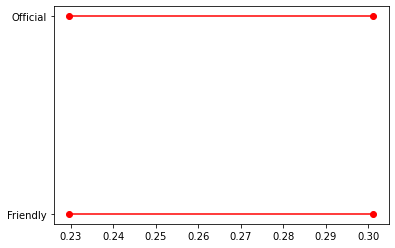

In [50]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

# Part II

In [4]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [5]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [7]:
from pandas.api.types import CategoricalDtype
cats=['Fri','Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu']
cat_type= CategoricalDtype(categories=cats, ordered=True)
df['weekdays']= df['weekdays'].astype(cat_type)

In [8]:
dfegy=df[df['country']=='Egypt']

In [11]:
import numpy as np

In [12]:
stats=dfegy.groupby('weekdays').agg({'dcases':[np.mean,np.std,np.size]})

In [13]:
stats

dcases                 
                mean         std size
weekdays                             
Fri       567.161616  428.533849   99
Sat       558.806122  421.803605   98
Sun       545.520408  422.358748   98
Mon       561.846939  442.137949   98
Tue       566.153061  419.125460   98
Wed       561.479592  406.337812   98
Thu       567.683673  410.020004   98